# 타이타닉 생존자 예측하기.

변수

1. Survival: 생존 여부
    <br>0 = No,
    <br>1 = yes
    
2. Pciass: 좌석 등급
    <br>1= 1st,
    <br>2= 2nd,
    <br>3= 3rd
    
3. Sex: 성별
<br>
4. Age: 나이
<br>
5. SibSp: 탑승한 형제자매/배우자 수 	
<br>
6. Parch: 탑승한 부모/자녀 수
<br>
7. Ticket: 티켓 번호
<br>
8. Fare: 승객 요금
<br>
9. Cabin: 객실 번호
<br>
10. Embarked: 승선항(출발 도시)
    <br>C = Cherbourg,
    <br>Q = Queenstown,
    <br>S = Southampton




    

모든 여성 승객만 생존한다고 가정하는 일련의 예측인  <br>gender_submission.csv도 포함.

*참고사항
 <br> Age: 연령은 1보다 작으면 분수
 <br>Parch: 부모(어머니, 아버지), 자녀(딸 ,아들, 의붓딸, 의붓아들)

In [3]:
import pandas as pd

train = pd.read_csv('E:\\kimybeom\\kaggle\\titanic\\train.csv')
test = pd.read_csv('E:\\kimybeom\\kaggle\\titanic\\test.csv')

In [4]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
print(train.shape)
print(test.shape)

(891, 12)
(418, 11)


## 시각화 해보기.

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline  
#실행한 브라우저에서 바로 그림을 볼수 있게 해줌.


import seaborn as sns
sns.set()  #displot을 통해 figure를 확보하고 kind를 통해 함수 선택
           #kind가 없으면 default인 histplot을 선택.

<AxesSubplot:xlabel='Survived', ylabel='count'>

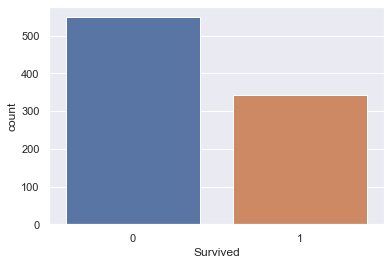

In [7]:
sns.countplot(x = "Survived", data= train) #생존자의 숫자를 시각화.

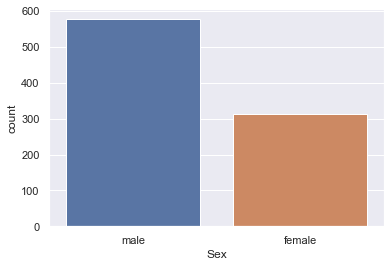

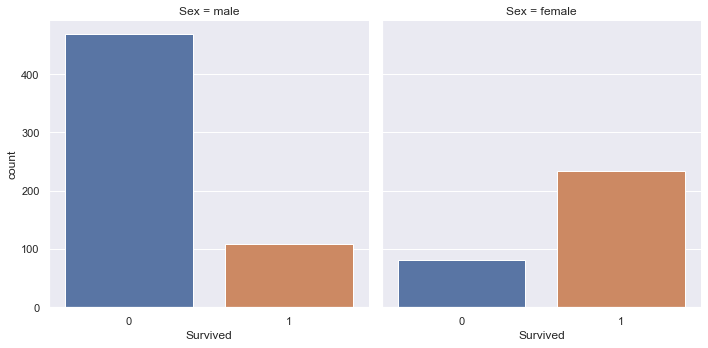

In [8]:
sns.countplot(x ="Sex", data = train)
sns.catplot(x= "Survived", col= "Sex", kind= "count", data=train)
#x = x축 변수, col= 종류, kind= y축 변수, data= 이용할 데이터셋.

In [9]:
train.groupby(['Sex']).Survived.sum() #성별에 따른 생존자의 수를 수치화.

Sex
female    233
male      109
Name: Survived, dtype: int64

In [10]:
#각 성별에 따른 생존확률.
print(train[train.Sex == "female"].Survived.sum()/train[train.Sex == "female"].Survived.count())
print(train[train.Sex == "male"].Survived.sum()/train[train.Sex == "male"].Survived.count())

0.7420382165605095
0.18890814558058924


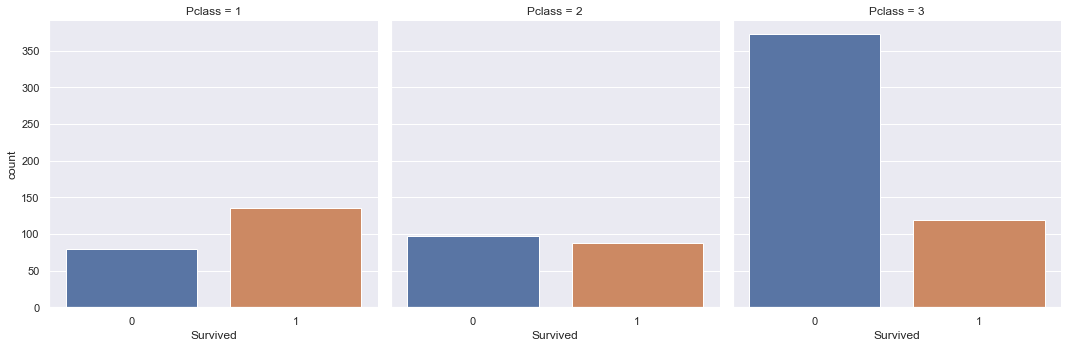

In [11]:
#Pclass(승선자의 사회-경제적 지위)에 따른 생존자의 수 시각화.
sns.catplot(x= "Survived", col= "Pclass", kind= "count", data=train)

## 시각화 심화 버전.

In [12]:
def bar_chart(feature): #bar_chart이름의 함수만들기.
    survived = train[train['Survived'] ==1][feature].value_counts()
    #첫번째 바 이름 = 데이터셋[데이터셋[중에서 변수]== 원하는 데이터][변수 설정].value_counts()
    dead = train[train['Survived'] == 0][feature].value_counts()
    #두번째 바 설정.
    df = pd.DataFrame([survived,dead]) # 국룰
    df.index = ['Survived', 'Dead'] #목록
    df.plot(kind = 'bar', stacked =True, figsize=(8,12)) #스택그래프를 그리려면, stacked = True 추가.

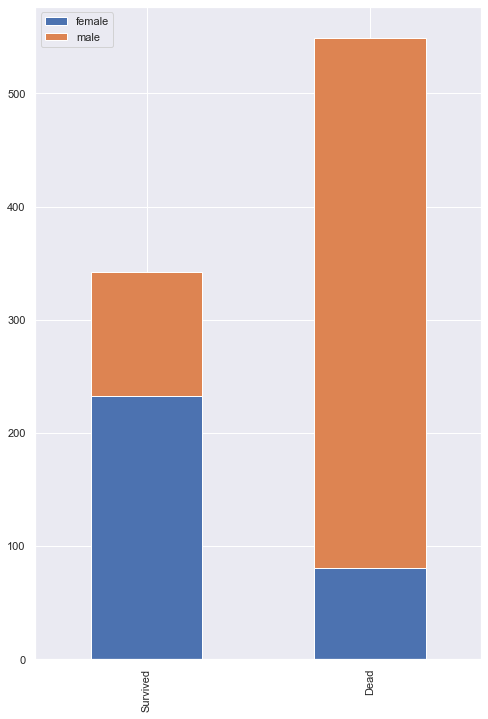

In [13]:
bar_chart('Sex')

여성의 생존 비율이 남성보다 높다.

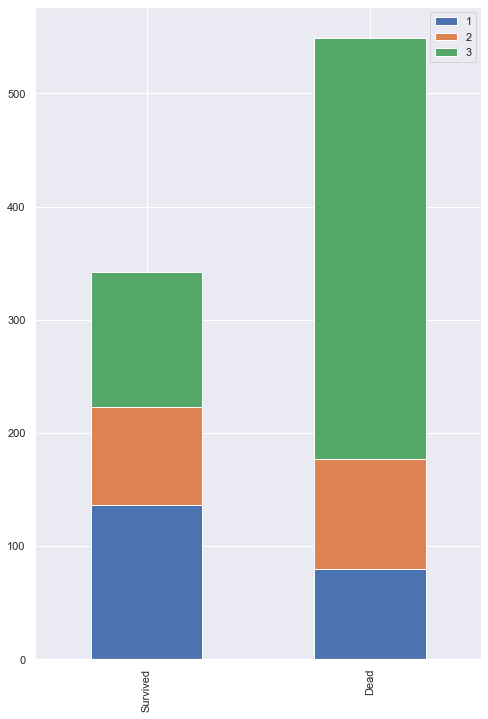

In [14]:
bar_chart('Pclass')

1등석의 생존 비율이 제일 높고
<br>3등석의 사망 비율이 제일 높다.

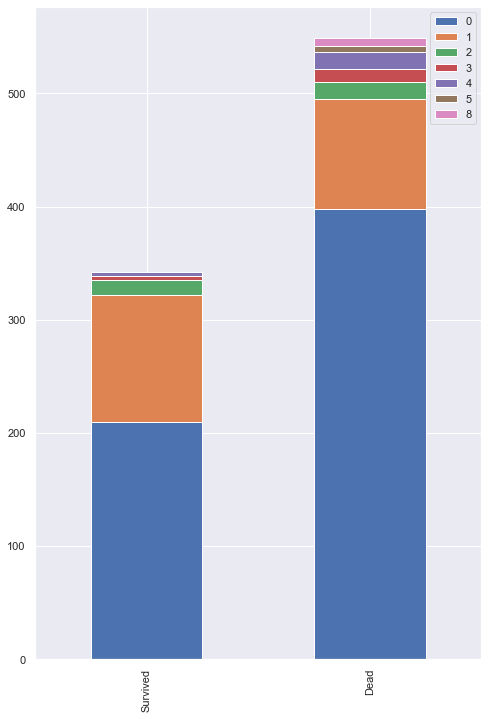

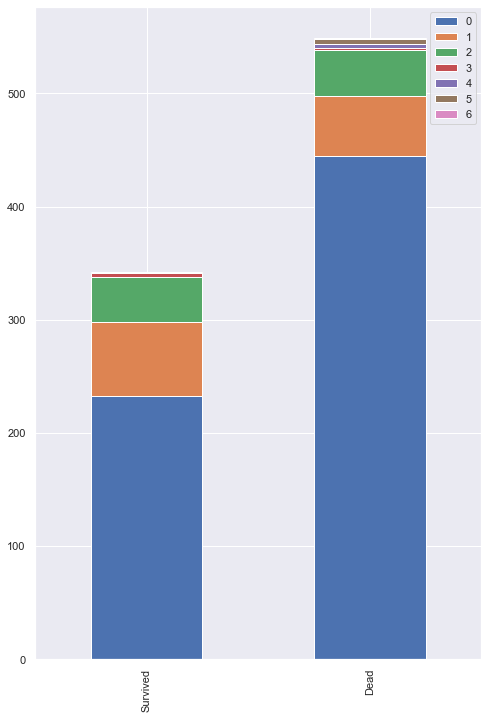

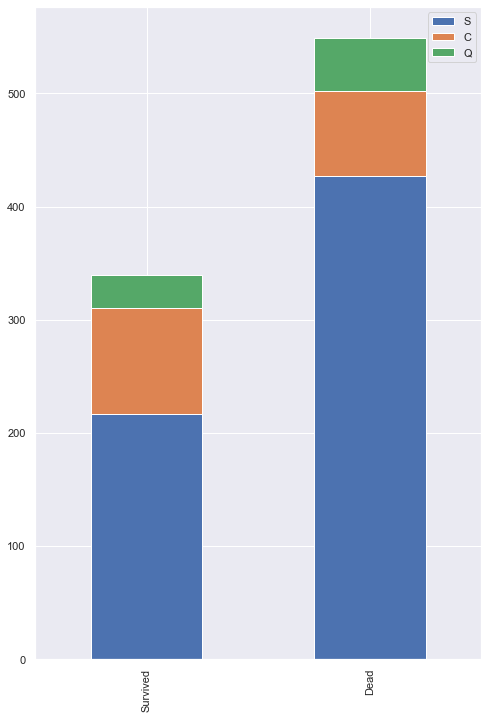

In [15]:
bar_chart('SibSp')
bar_chart('Parch')
bar_chart('Embarked')

2명 이상의 형제자매 또는 배우자와 함께 탑승한 사람이 생존 가능성이 더 높다.
<br>
<br>
형제자매나 배우자 없이 탑승한 사람이 사망할 가능성이 더 높다.
<br>
<br>
2명 이상의 부모 또는 자녀와 함께 탑승한 사람이 생존 가능성이 더 높다.
<br>
<br>
혼자있는 경우, 사망의 확률이 높다.
<br>
<br>
승선항의 경우,
<br><br>
C에서 탑승한 사람이 생존할 가능성이 약간 더 높다는 점과,
<br>
Q와 S에서 탑승한 사람이 사망할 가능성이 더 높다는 것을 확인할 수 있다.

# 전처리 하기.

In [16]:
survived_train = train.Survived #train데이터의 Survived 변수를 따로 저장.

data = pd.concat([train.drop(['Survived'], axis=1), test]) #train 데이터의 Survived 변수를 제거 후, test 데이터와 합치기.

data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [17]:
data.info() #결측치 확인하기.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Pclass       1309 non-null   int64  
 2   Name         1309 non-null   object 
 3   Sex          1309 non-null   object 
 4   Age          1046 non-null   float64
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Ticket       1309 non-null   object 
 8   Fare         1308 non-null   float64
 9   Cabin        295 non-null    object 
 10  Embarked     1307 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 122.7+ KB


In [18]:
data['Age'] = data.Age.fillna(data.Age.median()) #결측치를 중위값으로 채우기.
data['Fare'] = data.Fare.fillna(data.Fare.median())

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Pclass       1309 non-null   int64  
 2   Name         1309 non-null   object 
 3   Sex          1309 non-null   object 
 4   Age          1309 non-null   float64
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Ticket       1309 non-null   object 
 8   Fare         1309 non-null   float64
 9   Cabin        295 non-null    object 
 10  Embarked     1307 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 122.7+ KB


In [19]:
data = pd.get_dummies(data, columns=['Sex'], drop_first=True) #pd.get_dummies: 가변수 만들기(수치형 데이터로 변환하기.)
#성별 데이터(남, 여) 1, 0로 수치화 하기.

'''
number_sex = {'male': 1, 'female': 0}
for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(number_sex)
#또 다른 성별 데이터(남,여)를 1, 0로 수치화 하기. 
'''
data.head()

,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_male
0,1,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,0
4,5,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,1


In [20]:
data1 = data[['Sex_male', 'Fare', 'Age', 'Pclass', 'SibSp']]

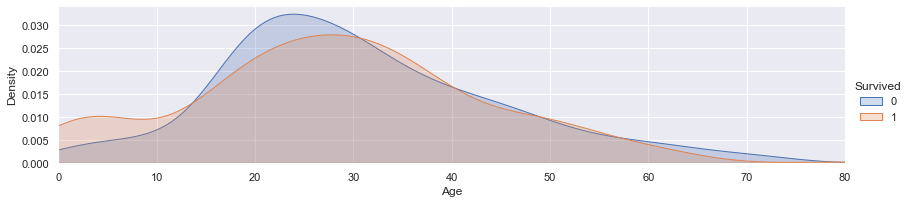

In [21]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
 
plt.show() 

(0.0, 20.0)

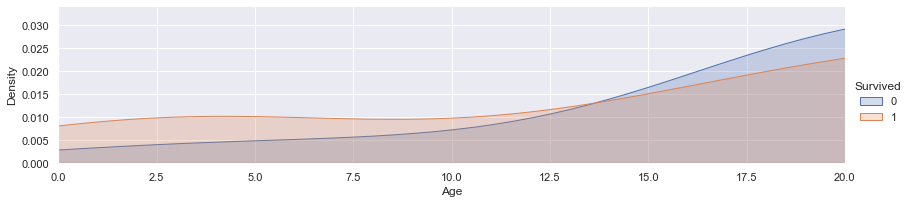

In [22]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.xlim(0, 20)

In [27]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [39]:

data1 = data[['Sex_male', 'Fare', 'Age', 'Pclass', 'SibSp']]
data1.head()

,Sex_male,Fare,Age,Pclass,SibSp
0,1,7.2500,22.0,3,1
1,0,71.2833,38.0,1,1
2,0,7.9250,26.0,3,0
3,0,53.1000,35.0,1,1
4,1,8.0500,35.0,3,0


In [47]:
age_data= data['Age']
bins = pd.cut(age_data,5)
bins
ranges= [16, 26, 36, 62]
a = pd.cut(age_data, ranges)
a
bins.describe()

count                 1309
unique                   5
top       (16.136, 32.102]
freq                   787
Name: Age, dtype: object

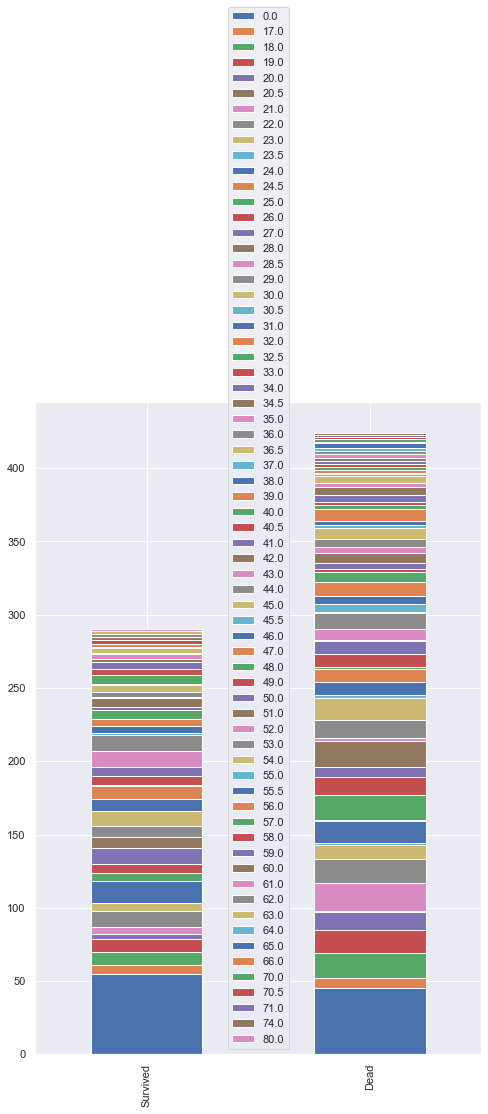

In [49]:
bar_chart('Age')

In [52]:
train.Cabin.value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

<AxesSubplot:>

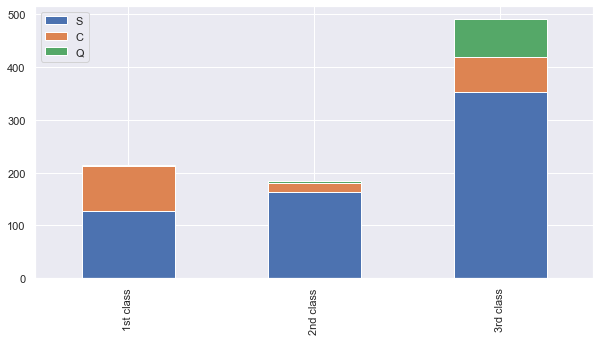

In [55]:
Pclass1 = train[train['Pclass']==1]['Embarked'].value_counts()
Pclass2 = train[train['Pclass']==2]['Embarked'].value_counts()
Pclass3 = train[train['Pclass']==3]['Embarked'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class','2nd class', '3rd class']
df.plot(kind='bar',stacked=True, figsize=(10,5))

In [56]:
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')

In [57]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [58]:
embarked_mapping = {"S": 0, "C": 1, "Q": 2}
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].map(embarked_mapping)

In [59]:
# fill missing Fare with median fare for each Pclass
train["Fare"].fillna(train.groupby("Pclass")["Fare"].transform("median"), inplace=True)
test["Fare"].fillna(test.groupby("Pclass")["Fare"].transform("median"), inplace=True)
train.head(50)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,0,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,0,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,0,Mr
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,2,Mr
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E,0,Mr
7,8,0,3,"Palsson, Master. Gosta Leonard",male,0.0,3,1,349909,21.0750,NaN,0,Master
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,0,Mrs
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,0.0,1,0,237736,30.0708,NaN,1,Mrs


In [53]:
for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].str[:1]

<AxesSubplot:>

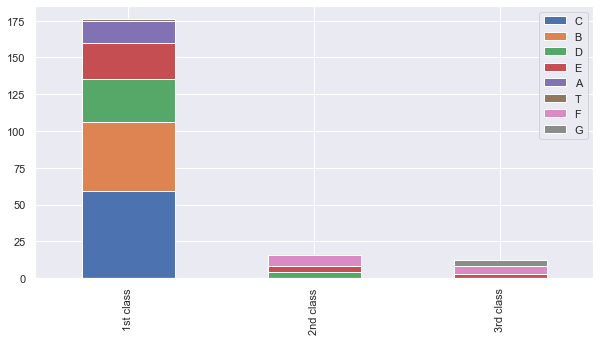

In [54]:
Pclass1 = train[train['Pclass']==1]['Cabin'].value_counts()
Pclass2 = train[train['Pclass']==2]['Cabin'].value_counts()
Pclass3 = train[train['Pclass']==3]['Cabin'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class','2nd class', '3rd class']
df.plot(kind='bar',stacked=True, figsize=(10,5))

In [63]:
# Importing Classifier Modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import numpy as np

In [64]:
#K-fold
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits = 10, shuffle = True, random_state=0)

In [68]:
#kNN
clf = KNeighborsClassifier(n_neighbors = 13)
train_data = train.drop('Survived', axis=1)
target = train['Survived']
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[nan nan nan nan nan nan nan nan nan nan]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py", line 179, in fit
    return self._fit(X, y)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 363, in _fit
    X, y = self._validate_data(X, y, accept_sparse="csr",
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Progra

In [69]:
# kNN Score
round(np.mean(score)*100,2)

nan